In [5]:
import pandas as pd
import numpy as np




In [6]:
weather = pd.read_csv("C:/Users/SHRADDHA/Desktop/weather_data.csv", index_col="DATE")

In [7]:
weather

,STATION,NAME,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT05,WT08
DATE,,,,,,,,,,,,,,,,,
01-01-2021,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",4.47,NaN,0.00,NaN,60.0,40.0,290,290.0,15.0,18.1,NaN,NaN,NaN,NaN,1.0
02-01-2021,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",2.24,NaN,0.14,NaN,57.0,51.0,230,230.0,10.1,13.0,1.0,NaN,NaN,NaN,1.0
03-01-2021,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",2.91,NaN,0.00,NaN,56.0,49.0,260,250.0,14.1,15.0,1.0,1.0,NaN,NaN,1.0
04-01-2021,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",10.07,NaN,0.36,NaN,62.0,46.0,240,130.0,21.9,29.1,1.0,NaN,NaN,NaN,1.0
05-01-2021,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",4.70,NaN,0.00,NaN,59.0,42.0,300,260.0,13.0,15.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16-04-2023,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",15.66,NaN,0.00,NaN,60.0,48.0,300,280.0,31.1,36.0,NaN,NaN,NaN,NaN,NaN
17-04-2023,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",15.43,NaN,0.00,NaN,59.0,50.0,290,270.0,25.1,35.1,NaN,NaN,NaN,NaN,NaN
18-04-2023,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",11.41,NaN,0.00,NaN,59.0,46.0,290,310.0,25.9,40.9,NaN,NaN,NaN,NaN,NaN


In [8]:
weather.apply(pd.isnull).sum()/weather.shape[0]


STATION    0.000000
NAME       0.000000
AWND       0.000000
PGTM       0.996429
PRCP       0.001190
TAVG       1.000000
TMAX       0.003571
TMIN       0.004762
WDF2       0.000000
WDF5       0.003571
WSF2       0.000000
WSF5       0.003571
WT01       0.666667
WT02       0.977381
WT03       0.985714
WT05       0.998810
WT08       0.888095
dtype: float64

In [11]:
core_weather = weather[["PRCP",  "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip",  "temp_max", "temp_min"]

In [12]:
core_weather.apply(pd.isnull).sum()


precip      1
temp_max    3
temp_min    4
dtype: int64

In [14]:
core_weather[pd.isnull(core_weather["precip"])]



,precip,temp_max,temp_min
DATE,,,
29-03-2023,NaN,52.0,43.0


In [17]:
core_weather["precip"] = core_weather["precip"].fillna(0)


In [18]:
core_weather.apply(pd.isnull).sum()


precip      0
temp_max    3
temp_min    4
dtype: int64

In [19]:
core_weather[pd.isnull(core_weather["temp_min"])]


,precip,temp_max,temp_min
DATE,,,
08-10-2022,0.0,NaN,NaN
09-10-2022,0.0,NaN,NaN
10-10-2022,0.0,69.0,NaN
11-10-2022,0.0,66.0,NaN


In [20]:
core_weather = core_weather.fillna(method="ffill")


In [21]:
core_weather.apply(pd.isnull).sum()


precip      0
temp_max    0
temp_min    0
dtype: int64

In [22]:
# Check for missing value defined in data documentation
core_weather.apply(lambda x: (x == 9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

In [23]:
core_weather.dtypes


precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [24]:
core_weather.index


Index(['01-01-2021', '02-01-2021', '03-01-2021', '04-01-2021', '05-01-2021',
       '06-01-2021', '07-01-2021', '08-01-2021', '09-01-2021', '10-01-2021',
       ...
       '11-04-2023', '12-04-2023', '13-04-2023', '14-04-2023', '15-04-2023',
       '16-04-2023', '17-04-2023', '18-04-2023', '19-04-2023', '20-04-2023'],
      dtype='object', name='DATE', length=840)

In [26]:
core_weather.index


DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01',
               ...
               '2023-11-04', '2023-12-04', '2023-04-13', '2023-04-14',
               '2023-04-15', '2023-04-16', '2023-04-17', '2023-04-18',
               '2023-04-19', '2023-04-20'],
              dtype='datetime64[ns]', name='DATE', length=840, freq=None)

In [27]:
core_weather.index.year


Int64Index([2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=840)

<AxesSubplot:xlabel='DATE'>

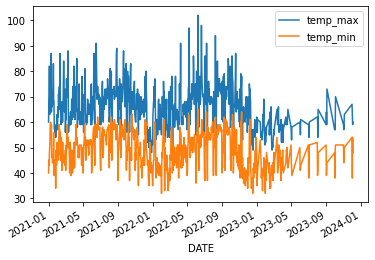

In [28]:
core_weather[["temp_max", "temp_min"]].plot()


In [29]:
core_weather.index.year.value_counts().sort_index()


2021    365
2022    365
2023    110
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

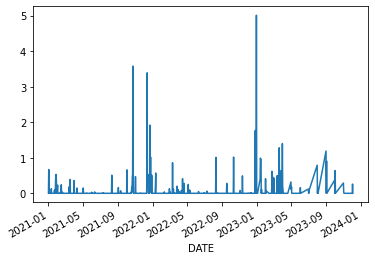

In [30]:
core_weather["precip"].plot()


<AxesSubplot:xlabel='DATE'>

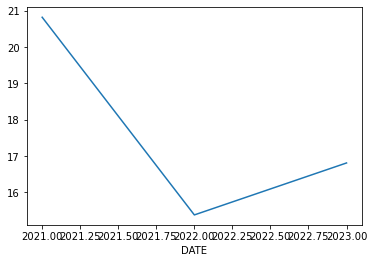

In [31]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()


In [32]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]


In [33]:
core_weather


,precip,temp_max,temp_min,target
DATE,,,,
2021-01-01,0.00,60.0,40.0,57.0
2021-02-01,0.14,57.0,51.0,56.0
2021-03-01,0.00,56.0,49.0,62.0
2021-04-01,0.36,62.0,46.0,59.0
2021-05-01,0.00,59.0,42.0,59.0
...,...,...,...,...
2023-04-16,0.00,60.0,48.0,59.0
2023-04-17,0.00,59.0,50.0,59.0
2023-04-18,0.00,59.0,46.0,62.0


In [34]:
core_weather = core_weather.iloc[:-1,:].copy()


In [35]:
core_weather


,precip,temp_max,temp_min,target
DATE,,,,
2021-01-01,0.00,60.0,40.0,57.0
2021-02-01,0.14,57.0,51.0,56.0
2021-03-01,0.00,56.0,49.0,62.0
2021-04-01,0.36,62.0,46.0,59.0
2021-05-01,0.00,59.0,42.0,59.0
...,...,...,...,...
2023-04-15,0.00,61.0,49.0,60.0
2023-04-16,0.00,60.0,48.0,59.0
2023-04-17,0.00,59.0,50.0,59.0


In [36]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)


In [37]:
predictors = ["precip", "temp_max", "temp_min"]


In [44]:
train = core_weather.loc[:"2021-12-31"]
test = core_weather.loc["2022-01-01":]

In [45]:
train


,precip,temp_max,temp_min,target
DATE,,,,
2021-01-01,0.00,60.0,40.0,57.0
2021-02-01,0.14,57.0,51.0,56.0
2021-03-01,0.00,56.0,49.0,62.0
2021-04-01,0.36,62.0,46.0,59.0
2021-05-01,0.00,59.0,42.0,59.0
...,...,...,...,...
2021-12-27,0.09,51.0,44.0,48.0
2021-12-28,0.01,48.0,41.0,51.0
2021-12-29,0.51,51.0,43.0,52.0


In [46]:
test


,precip,temp_max,temp_min,target
DATE,,,,
2022-01-01,0.00,51.0,35.0,55.0
2022-02-01,0.00,55.0,32.0,54.0
2022-03-01,0.13,54.0,42.0,57.0
2022-04-01,0.10,57.0,51.0,57.0
2022-05-01,0.00,57.0,50.0,55.0
...,...,...,...,...
2023-04-15,0.00,61.0,49.0,60.0
2023-04-16,0.00,60.0,48.0,59.0
2023-04-17,0.00,59.0,50.0,59.0


In [47]:
reg.fit(train[predictors], train["target"])


Ridge(alpha=0.1)

In [48]:
predictions = reg.predict(test[predictors])


In [49]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

18.739756047207443

In [50]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]


In [51]:
combined


,actual,predictions
DATE,,
2022-01-01,55.0,53.197572
2022-02-01,54.0,55.625874
2022-03-01,57.0,56.182138
2022-04-01,57.0,59.774201
2022-05-01,55.0,59.811074
...,...,...
2023-04-15,60.0,62.544099
2023-04-16,59.0,61.670391
2023-04-17,59.0,61.253767


<AxesSubplot:xlabel='DATE'>

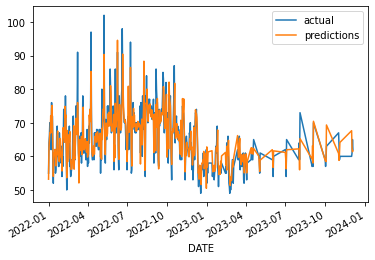

In [52]:
combined.plot()


In [53]:
reg.coef_


array([-1.89234183,  0.72134664,  0.15236149])

In [54]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [55]:
core_weather = core_weather.iloc[30:,:].copy()


In [58]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2021-12-31"]
    test = core_weather.loc["2022-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [59]:
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, core_weather, reg)
error

18.179753771576113

<AxesSubplot:xlabel='DATE'>

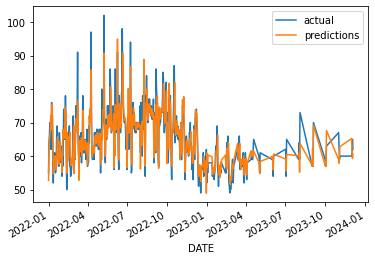

In [60]:
combined.plot()


In [61]:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())


In [62]:
error, combined = create_predictions(predictors + ["monthly_avg", "day_of_year_avg"], core_weather, reg)
error


20.609766803701767

In [63]:
reg.coef_


array([-1.77744691,  0.41596194,  0.18051919, 15.34652086,  3.34143569,
       -0.07622702,  0.41596194])

In [64]:
core_weather.corr()["target"]


precip            -0.196876
temp_max           0.829088
temp_min           0.599049
target             1.000000
month_max          0.702048
month_day_max     -0.416500
max_min            0.100529
monthly_avg        0.458792
day_of_year_avg    0.781988
Name: target, dtype: float64

In [65]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()


In [66]:
combined.sort_values("diff", ascending=False).head(10)


,actual,predictions,diff
DATE,,,
2022-06-20,98.0,74.639987,23.360013
2022-05-23,86.0,67.918388,18.081612
2022-03-09,91.0,75.081004,15.918996
2022-05-04,80.0,64.928525,15.071475
2022-06-04,86.0,71.109756,14.890244
2022-10-18,87.0,72.434236,14.565764
2022-05-09,102.0,87.786286,14.213714
2022-04-09,97.0,83.085521,13.914479
2022-03-21,78.0,64.267198,13.732802
